In [24]:
import numpy as np
import pandas as pd
import utils

import matplotlib.pyplot as plt 
import seaborn as sns
import seaborn.objects as so

In [25]:
import importlib
importlib.reload(utils)


<module 'utils' from '/home/acercyc/Project/Keio Testing_analysis/src/utils.py'>

In [26]:
fn = utils.path_data / 'ana_three_dot_predicting_individual_beh_profile/prediction.csv'
df = pd.read_csv(fn)
df['accuracy'] = df['accuracy']=='correct'


In [27]:
df_ = df.copy()
df_ = df_[['group','participant', 'actual control', 'angular bias', 'accuracy', 'auc_pred_accuracy']]
df_ = df_.groupby(['group','participant', 'actual control', 'angular bias']).mean().reset_index()

In [28]:
df_count = df_.value_counts(['group', 'accuracy', 'auc_pred_accuracy'])
# df_count.columns = ['count']
df_count = df_count.reset_index()
df_count.rename(columns={0:'Frequency'}, inplace=True)

# scaling 
df_count['Frequency'] = (df_count['Frequency'])**(1/2)


In [29]:
# g = sns.relplot(data=df_count, x='accuracy', y='auc_pred_accuracy', 
#                 size='Frequency', color='k',
#                 sizes=(3, 800), col='group', height=5)
# g.map(sns.regplot, 'accuracy', 'auc_pred_accuracy', color='red', scatter=False)
# g.set_axis_labels('Groud true accuracy', 'Predicted accuracy')


<AxesSubplot: title={'center': 'group = S'}, xlabel='accuracy', ylabel='auc_pred_accuracy'>

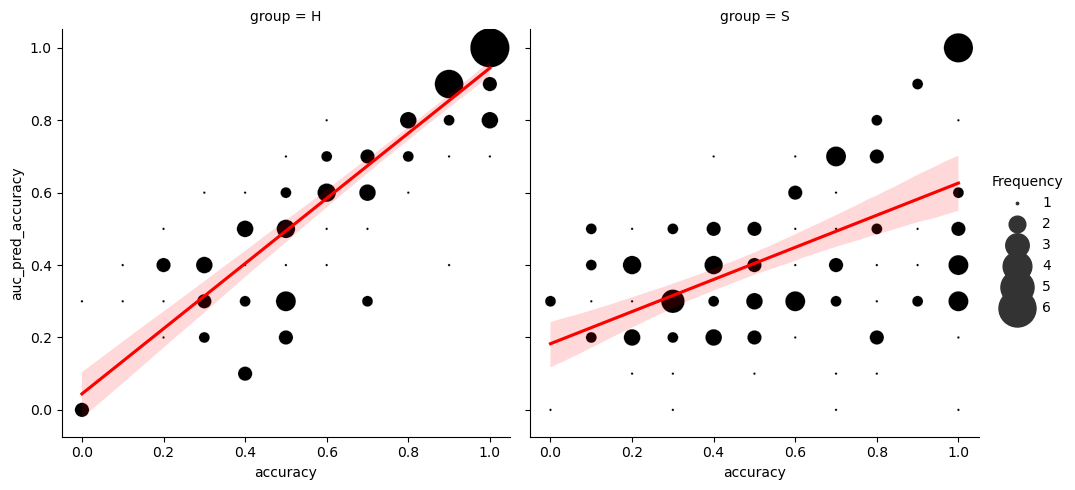

In [30]:
g = sns.relplot(data=df_count, x='accuracy', y='auc_pred_accuracy', 
                size='Frequency', color='k',
                sizes=(3, 800), col='group', height=5)
ax = g.figure.get_axes()
sns.regplot(data=df_.query('group=="H"'), x='accuracy', y='auc_pred_accuracy', color='red', scatter=False, ax=ax[0])
sns.regplot(data=df_.query('group=="S"'), x='accuracy', y='auc_pred_accuracy', color='red', scatter=False, ax=ax[1])

In [31]:
fn = utils.Save.savepath('ana_three_dot_prediction_corr', 'correlation_sns.pdf')
g.savefig(fn)

In [32]:
# from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, facet_grid, theme
# g = (
#     ggplot(df_count, aes(x='accuracy', y='auc_pred_accuracy'))
#     + facet_wrap('group')
#     + geom_point(aes(size='Frequency'))
#     + theme(aspect_ratio=1, figure_size=(10, 8))
# )
# print(g)
# fn = utils.Save.savepath('ana_three_dot_prediction_corr_cosinesimilarity', 'correlation.svg')
# g.save(fn)

### Compute correlation stats

In [33]:
import pingouin as pg
df_.groupby(['group']).apply(lambda x: pg.corr(x['accuracy'].values, x['auc_pred_accuracy'].values))

,,n,r,CI95%,p-val,BF10,power
group,,,,,,,
H,pearson,150,0.901101,"[0.87, 0.93]",1.416483e-55,1.008e+52,1.0
S,pearson,150,0.515420,"[0.39, 0.62]",1.488498e-11,6.341e+08,1.0


# Position only

In [34]:
predVar = 'auc_pred_accuracy_h'
df_ = df.copy()
df_ = df_[['group','participant', 'actual control', 'angular bias', 'accuracy', predVar]]
df_ = df_.groupby(['group','participant', 'actual control', 'angular bias']).mean().reset_index()

In [35]:
df_count = df_.value_counts(['group', 'accuracy', predVar])
# df_count.columns = ['count']
df_count = df_count.reset_index()
df_count.rename(columns={0:'Frequency'}, inplace=True)

# scaling 
df_count['Frequency'] = (df_count['Frequency'])**(1/2)

In [36]:
# g = sns.relplot(data=df_count, x='accuracy', y=predVar, 
#                 size='Frequency', color='k',
#                 sizes=(3, 800), col='group', height=5)
# g.map(sns.regplot, 'accuracy', predVar, color='red', scatter=False)
# g.set_axis_labels('Groud true accuracy', 'Predicted accuracy')


<AxesSubplot: title={'center': 'group = S'}, xlabel='accuracy', ylabel='auc_pred_accuracy_h'>

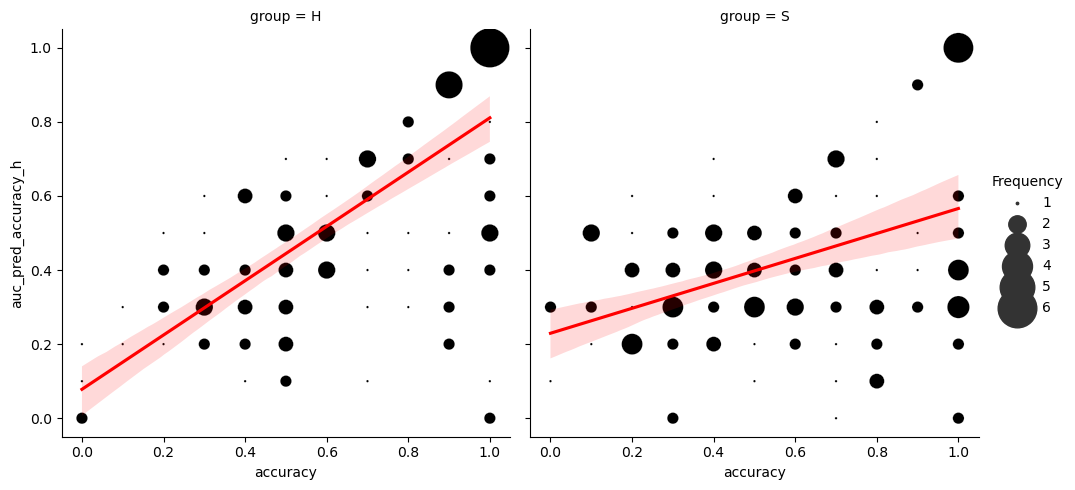

In [37]:
g = sns.relplot(data=df_count, x='accuracy', y=predVar, 
                size='Frequency', color='k',
                sizes=(3, 800), col='group', height=5)
ax = g.figure.get_axes()
sns.regplot(data=df_.query('group=="H"'), x='accuracy', y=predVar, color='red', scatter=False, ax=ax[0])
sns.regplot(data=df_.query('group=="S"'), x='accuracy', y=predVar, color='red', scatter=False, ax=ax[1])

In [38]:
fn = utils.Save.savepath('ana_three_dot_prediction_corr', 'correlation_h_sns.pdf')
g.savefig(fn)

In [39]:
import pingouin as pg
df_.groupby(['group']).apply(lambda x: pg.corr(x['accuracy'].values, x[predVar].values))

,,n,r,CI95%,p-val,BF10,power
group,,,,,,,
H,pearson,150,0.692504,"[0.6, 0.77]",9.635556e-23,5.255e+19,1.000000
S,pearson,150,0.400677,"[0.26, 0.53]",3.759949e-07,3.626e+04,0.999317
